In [33]:
#import libraries 
import  numpy as np            
import  pandas as pd   
import seaborn as sb
import matplotlib.pyplot as plt

# 1. Get Data
---

In [34]:
jobPost= pd.read_csv('fake_job_postings.csv')
jobPost.set_index('job_id', inplace=True)               
jobPost.info()
jobPost

<class 'pandas.core.frame.DataFrame'>
Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15184 non-null  object
 7   benefits             10668 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  fraudulen

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0


## 2a) Initial Cleanup

## Functions to use

In [35]:
def multiUniVarViz(df, columns=0, group=0):                                 #Function for univariate standard statistical description of multiple variables 
    if(columns==0): columns=df.columns.to_list()                            #columns=0 for all columns selected
    dataHandled = df[columns]

    nrows=len(columns)
    if(group): nrows -= (len(group)-1)

    if(nrows)==1: f, axes = plt.subplots(5, 1, figsize = (12*nrows,80)) 
    else: f, axes = plt.subplots(nrows, 5, figsize = (80,12*nrows)) 

    if(group):
        if(nrows!=1): 
            axesHandled = [
            axes[0,0],
            axes[0,1],
            axes[0,2],
            axes[0,3],
            axes[0,4]
            ]
        else: 
            axesHandled = [
            axes[0],
            axes[1],
            axes[2],
            axes[3],
            axes[4]
            ]
        sb.boxplot(data = dataHandled[group], orient = "h", ax = axesHandled[0])                
        sb.violinplot(data = dataHandled[group], orient = "h", ax = axesHandled[1])
        sb.histplot(data = dataHandled[group], kde=True, ax = axesHandled[2])
        sb.countplot(data = dataHandled[group], orient = "h", ax = axesHandled[3], native_scale=True)
        sb.stripplot(data = dataHandled[group], orient = "h", ax=axesHandled[4])
        nongroupData = dataHandled.drop(columns=group)
        nongroupcolumns = nongroupData.columns.to_list()
    else: 
        nongroupData = dataHandled
        nongroupcolumns = columns

    for i, column in enumerate(nongroupcolumns):
        if(group): i += 1 
        if(nrows!=1): 
            axesHandled = [
            axes[i,0],
            axes[i,1],
            axes[i,2],
            axes[i,3],
            axes[i,4]
            ]
        else: 
            axesHandled = [
            axes[0],
            axes[1],
            axes[2],
            axes[3],
            axes[4]
            ]
        sb.boxplot(data = nongroupData, x=column, orient = "h", ax = axesHandled[0])                
        sb.violinplot(data = nongroupData, x=column, ax = axesHandled[1])
        sb.histplot(data = nongroupData, x=column, kde=True, ax = axesHandled[2])
        sb.countplot(data = nongroupData, y=column, ax=axesHandled[3], native_scale=True)
        sb.stripplot(data = nongroupData, x=column, ax=axesHandled[4])
                                                                            
    statsum = df[columns].describe()                                       #Univariate Stats Summary  
    fstat = plt.figure(figsize=(5, 5))
    sb.heatmap(statsum, linewidths = 1, annot = True, annot_kws = {'size': 9}, cmap = 'BuGn', fmt='g')

    return df[columns]

def multivarViz(df, columns=0, responseVar=0,numpos=1,catpos=1):                              #Function for multivatiate (Correlation) statistical description of multiple variables as numeric variables
    if(columns==0): columns=df.columns.to_list()
    lencols=len(columns)
    dataHandled = df[columns]
    
    statsum = dataHandled.describe()                                       #Univariate Stats Summary
    fstat = plt.figure(figsize=(5, 5))
    sb.heatmap(statsum, linewidths = 1, annot = True, annot_kws = {'size': 9}, cmap = 'BuGn', fmt='g')

    numData = dataHandled.select_dtypes(exclude=['object'])
    numEmpty = numData.empty
    if(responseVar and responseVar not in numData.columns.to_list()):
        numData = pd.concat([numData, dataHandled[responseVar]],axis=1)
    numcols = numData.columns.to_list()
    lennumcols = len(numcols)
    catData = dataHandled.select_dtypes(include=['object'])
    catEmpty = catData.empty
    if(responseVar and responseVar not in catData.columns.to_list()):
        catData = pd.concat([catData, dataHandled[responseVar]],axis=1)
    catcols = catData.columns.to_list()
    lencatcols = len(catcols)

    if(not catEmpty and catpos):
        pairplot = sb.pairplot(catData, vars=catData.columns.to_list())
        for ax in pairplot.axes.flatten():
            ax.xaxis.set_visible(False)
            
        if(responseVar): 
            f, axes = plt.subplots(1, lencatcols-1, figsize = (16*(lencatcols-1), 16))
            predictors = catcols.copy()
            predictors.remove(responseVar)

            predictormediansort = {}
            for predictor in predictors:
                responseMedian = catData.groupby(predictor)[responseVar].median()
                sortedbyMedian = responseMedian.sort_values(ascending=True).index.to_list()
                predictormediansort[predictor] = sortedbyMedian
        
            if(lencatcols<=2): 
                column = predictors[0]
                sb.stripplot(data=catData, x=column, y=responseVar, order=predictormediansort[column], hue=responseVar)
            else:
                for i, column in enumerate(predictors):
                    sb.stripplot(data=catData, x=column, y=responseVar, order=predictormediansort[column], hue=responseVar, ax=axes[i])

    if(not numEmpty and numpos): 
        corrMat = numData.corr()
        fheat = plt.figure(figsize=(8, 8))
        sb.heatmap(corrMat, vmin = -1, vmax = 1, annot = True, cmap="OrRd")
        if(responseVar==0): 
            sb.pairplot(numData, diag_kind='hist')
            return dataHandled
        sb.pairplot(numData, hue=responseVar, diag_kind='hist')

        f, axes = plt.subplots(1, lennumcols-1, figsize = (4*(lennumcols-1), 4))
        predictors = numcols.copy()
        predictors.remove(responseVar)
        if(lennumcols<=2): 
            column = predictors[0]
            sb.scatterplot(data=numData, x=column, y=responseVar, hue=responseVar)
            return dataHandled
        for i, column in enumerate(predictors):
            sb.scatterplot(data=numData, x=column, y=responseVar, hue=responseVar, ax=axes[i])        

    return dataHandled

### Dropping Non-structured Data

In [36]:
noncont=[
    'company_profile',
    'description',
    'requirements',
    'benefits',
]
jobPost.drop(columns=noncont, inplace=True)
jobPost

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0


### Dropping Duplicated Data

In [37]:
# Checking for duplicates
dup = jobPost.duplicated().sum()
print(f'Number of duplicates: {dup}')

# Remove duplicates
jobPost.drop_duplicates(inplace=True)

Number of duplicates: 681


## 2b) Numerics

### Getting DF of numeric dtypes only to check correlation between all the numerical columns

In [39]:
num_columns=[]
for col in jobPost.columns:
    if jobPost[col].dtypes !='object':
            num_columns.append(col)
num_columns.append('salary_range')
numDF = jobPost[num_columns]

numDF.dropna(subset=['salary_range'],inplace=True)
numDF['salary_low']=numDF['salary_range'].apply(lambda x: x.split('-')[0])
numDF['salary_high']=numDF['salary_range'].apply(lambda x: x.split('-')[-1])
numDF.drop(columns='salary_range', inplace=True)
numDF['salary_low'] = pd.to_numeric(numDF['salary_low'], errors='coerce')
numDF['salary_high'] = pd.to_numeric(numDF['salary_high'], errors='coerce')
numDF.dropna(subset=['salary_low','salary_high'])

/var/folders/7r/xwzg8_wn39n4_tdvb1f0ymbm0000gn/T/ipykernel_3102/1820381447.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDF.dropna(subset=['salary_range'],inplace=True)
/var/folders/7r/xwzg8_wn39n4_tdvb1f0ymbm0000gn/T/ipykernel_3102/1820381447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDF['salary_low']=numDF['salary_range'].apply(lambda x: x.split('-')[0])
/var/folders/7r/xwzg8_wn39n4_tdvb1f0ymbm0000gn/T/ipykernel_3102/1820381447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,telecommuting,has_company_logo,has_questions,fraudulent,salary_low,salary_high
job_id,,,,,,
7,0,1,1,0,20000.0,28000.0
11,0,0,0,0,100000.0,120000.0
16,0,1,1,0,120000.0,150000.0
24,0,1,0,0,100000.0,120000.0
32,0,1,0,0,50000.0,65000.0
...,...,...,...,...,...,...
17845,0,1,0,0,0.0,0.0
17850,0,1,0,0,80000.0,100000.0
17866,0,1,1,0,18000.0,20000.0


### Univariate Distribution

,telecommuting,has_company_logo,has_questions,fraudulent,salary_low,salary_high
job_id,,,,,,
7,0,1,1,0,20000.0,28000.0
11,0,0,0,0,100000.0,120000.0
16,0,1,1,0,120000.0,150000.0
24,0,1,0,0,100000.0,120000.0
32,0,1,0,0,50000.0,65000.0
...,...,...,...,...,...,...
17845,0,1,0,0,0.0,0.0
17850,0,1,0,0,80000.0,100000.0
17866,0,1,1,0,18000.0,20000.0


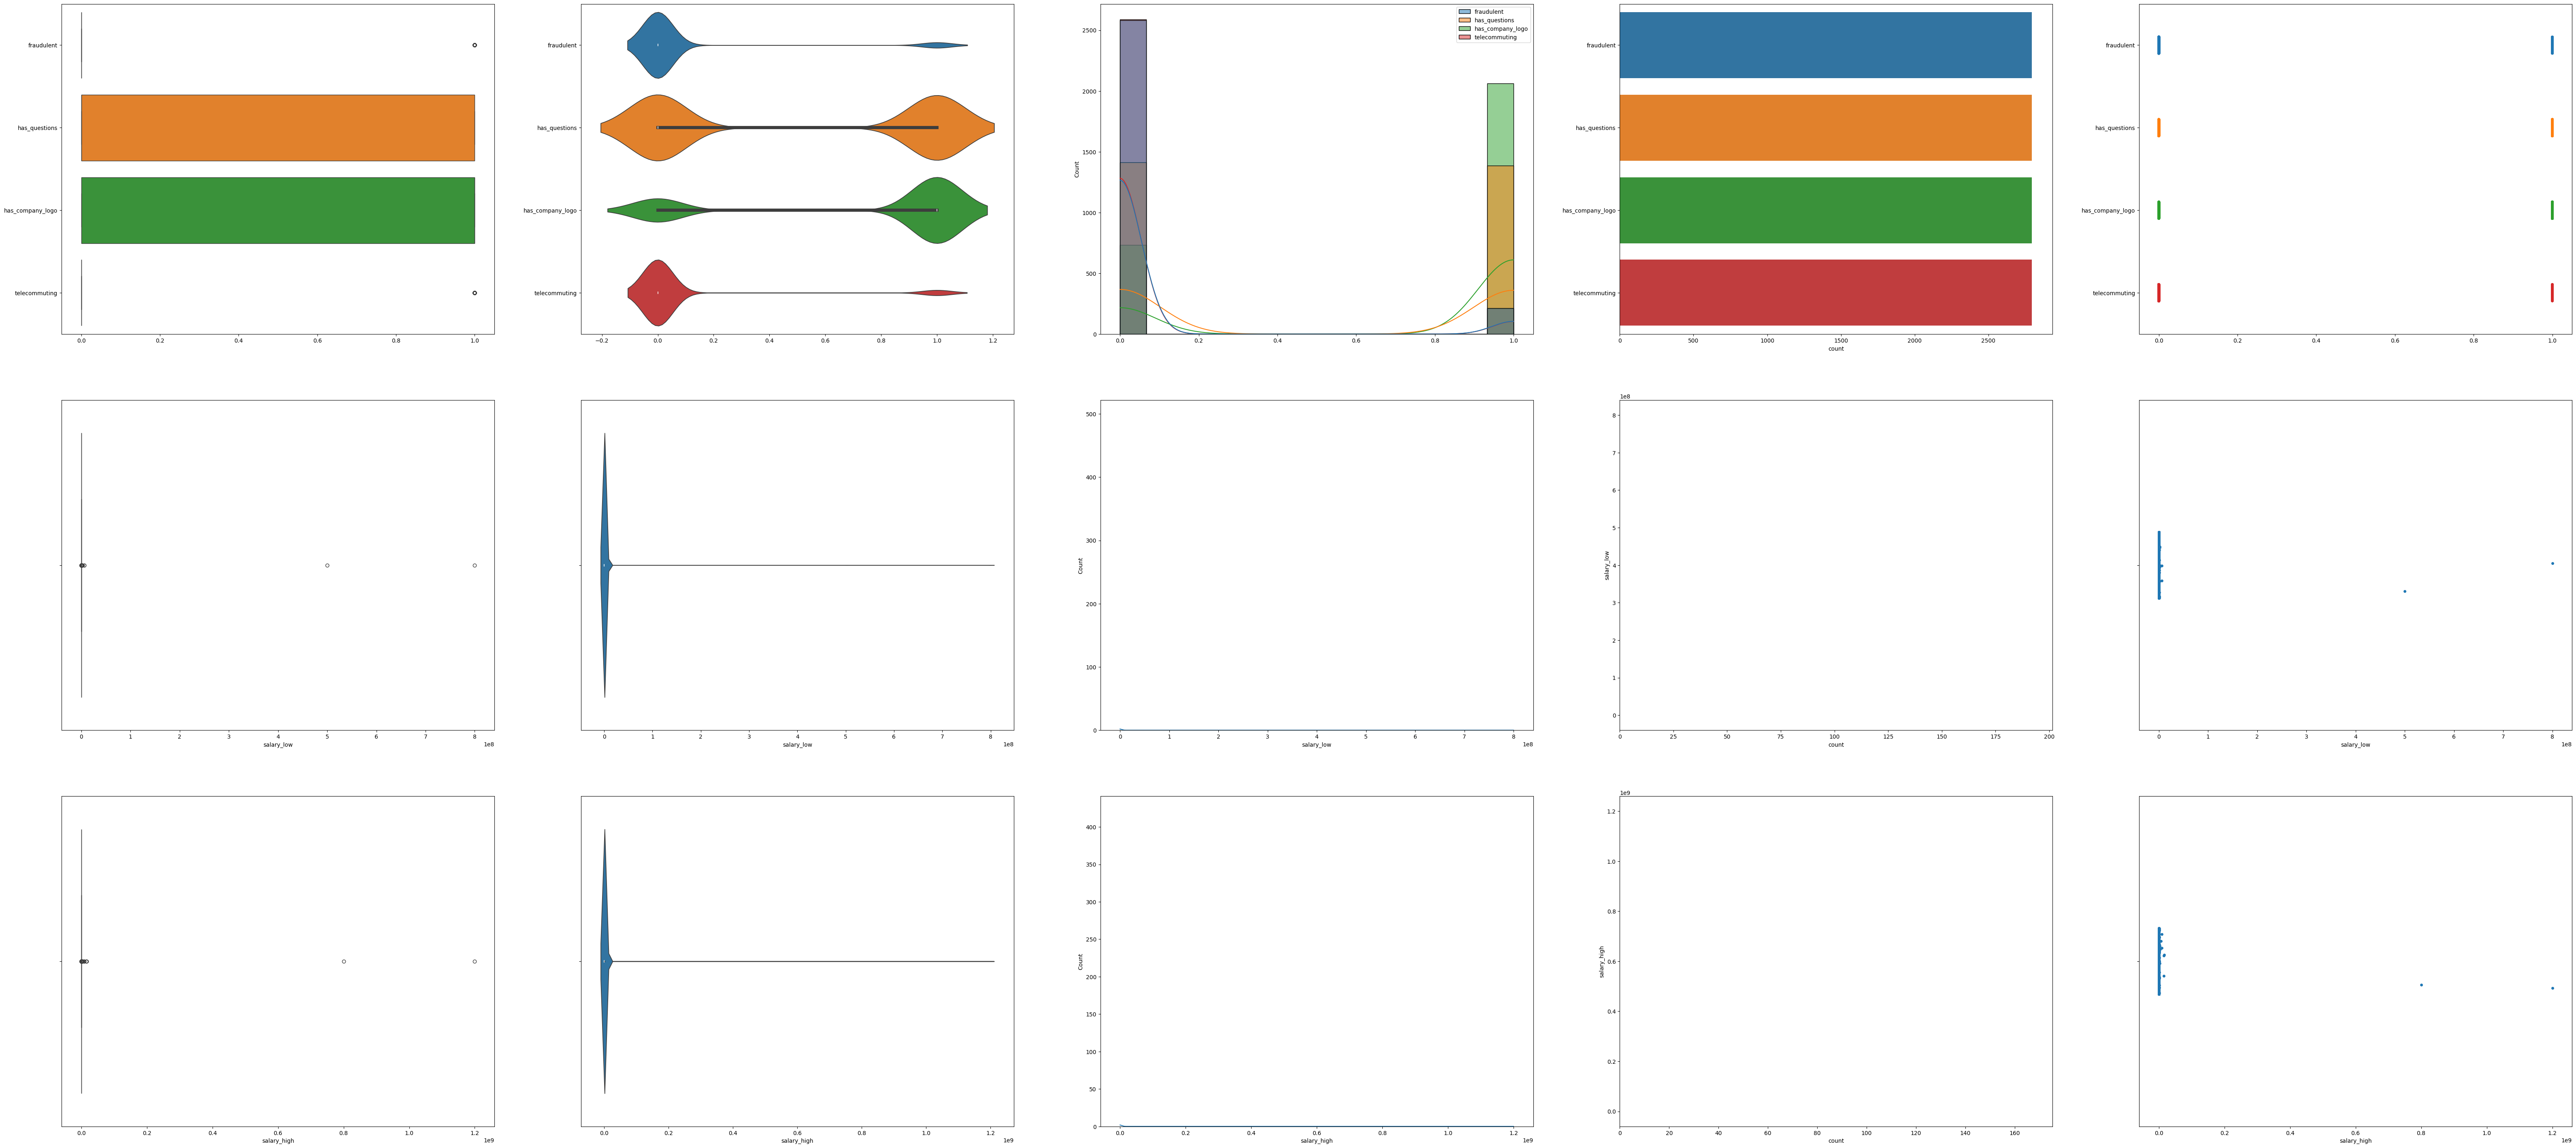

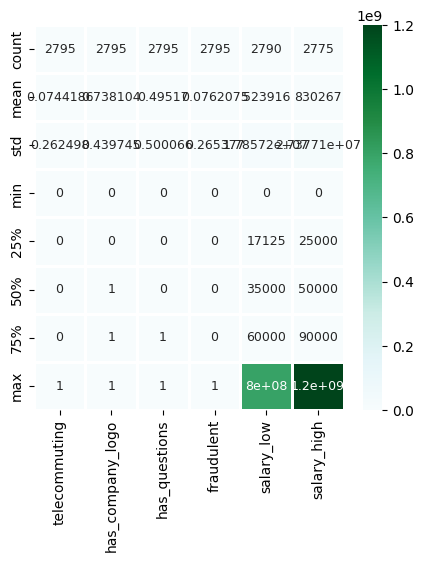

In [42]:
multiUniVarViz(numDF, group = ['fraudulent', 'has_questions', 'has_company_logo', 'telecommuting'])

### Relationship Analysis

<Axes: >

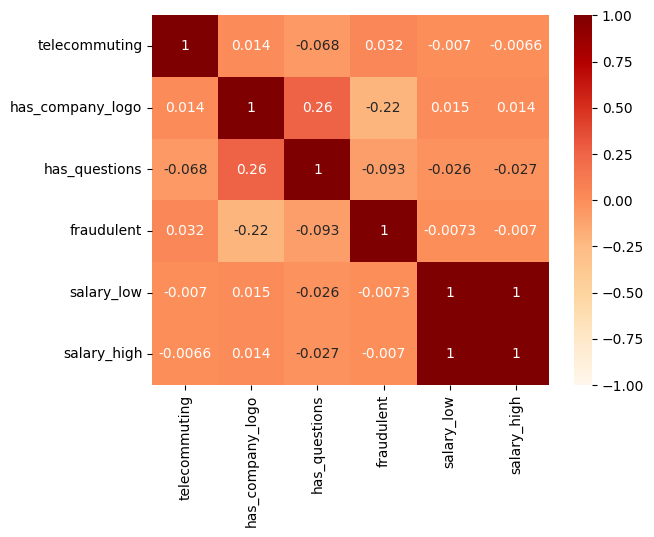

In [ ]:
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, cmap="OrRd")

#### Numerics only

Scatterplot of [salary_low], [salary_high], and [fraudulent] (binary, hue)

<Axes: xlabel='salary_low', ylabel='salary_high'>

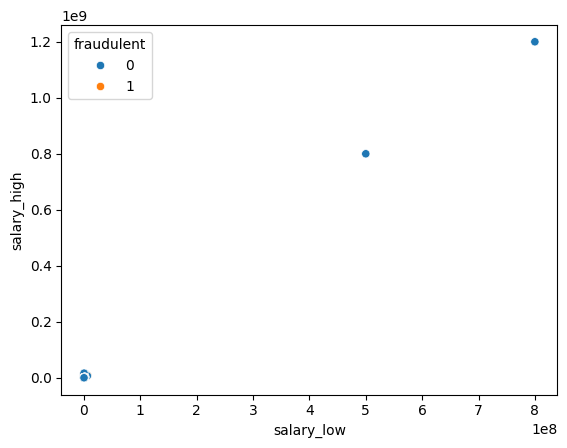

In [40]:
sb.scatterplot(numDF, x='salary_low', y='salary_high', hue='fraudulent')

#### Binaries only

,telecommuting,has_company_logo,has_questions,fraudulent
job_id,,,,
7,0,1,1,0
11,0,0,0,0
16,0,1,1,0
24,0,1,0,0
32,0,1,0,0
...,...,...,...,...
17845,0,1,0,0
17850,0,1,0,0
17866,0,1,1,0


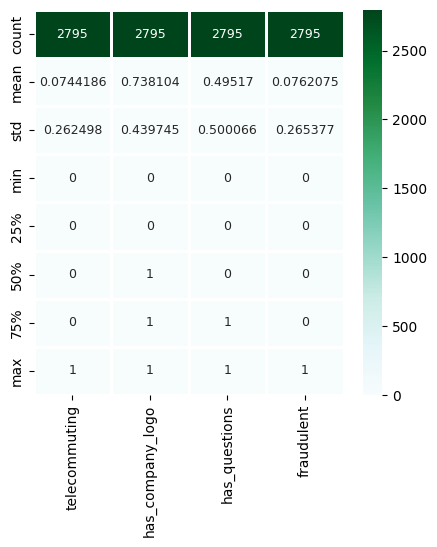

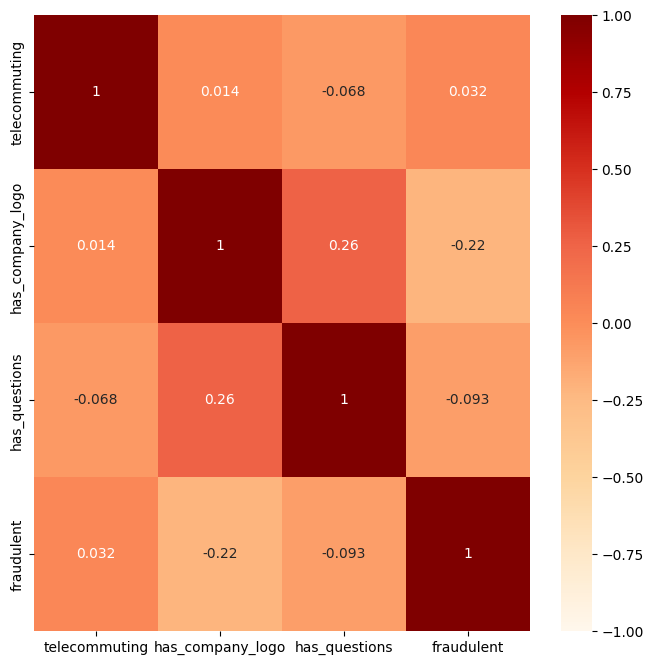

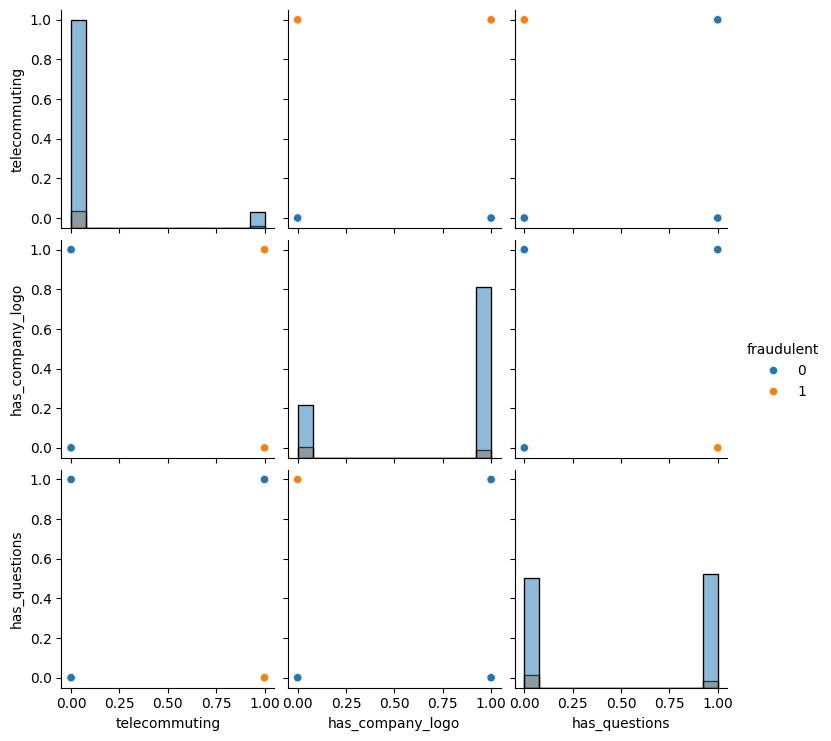

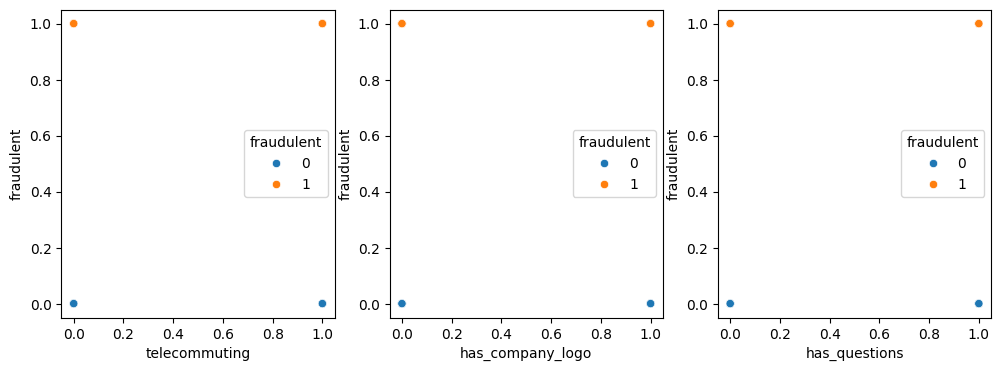

In [43]:
multivarViz(numDF, ['telecommuting','has_company_logo','has_questions','fraudulent'], 'fraudulent')

#### No relavant correlation all p <= 0.26, Weak Correlation
---

## 2c) Categorical Variables

Getting DF of categorical dtypes only to check correlation between all the numerical columns

In [44]:
def ensureUniqe(df):                                                            #Ensure not all values practically unique
    dropList=[]
    for col,ser in df.items():
        ser.dropna(inplace=True)
        if(ser.nunique()>len(ser)/16): dropList.append(col)
    return df.drop(columns=dropList)

cat_columns=[]
for col in jobPost.columns:
    if jobPost[col].dtypes =='object':
            cat_columns.append(col)
cat_columns.append('fraudulent')
cat_columns.remove('salary_range')
catData = jobPost[cat_columns].copy()

catData = ensureUniqe(catData)
catData

,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,
1,Other,Internship,NaN,NaN,Marketing,0
2,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,NaN,NaN,NaN,NaN,NaN,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...
17876,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17877,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,Full-time,NaN,NaN,NaN,NaN,0


,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,
1,Other,Internship,NaN,NaN,Marketing,0
2,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,NaN,NaN,NaN,NaN,NaN,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...
17876,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17877,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,Full-time,NaN,NaN,NaN,NaN,0


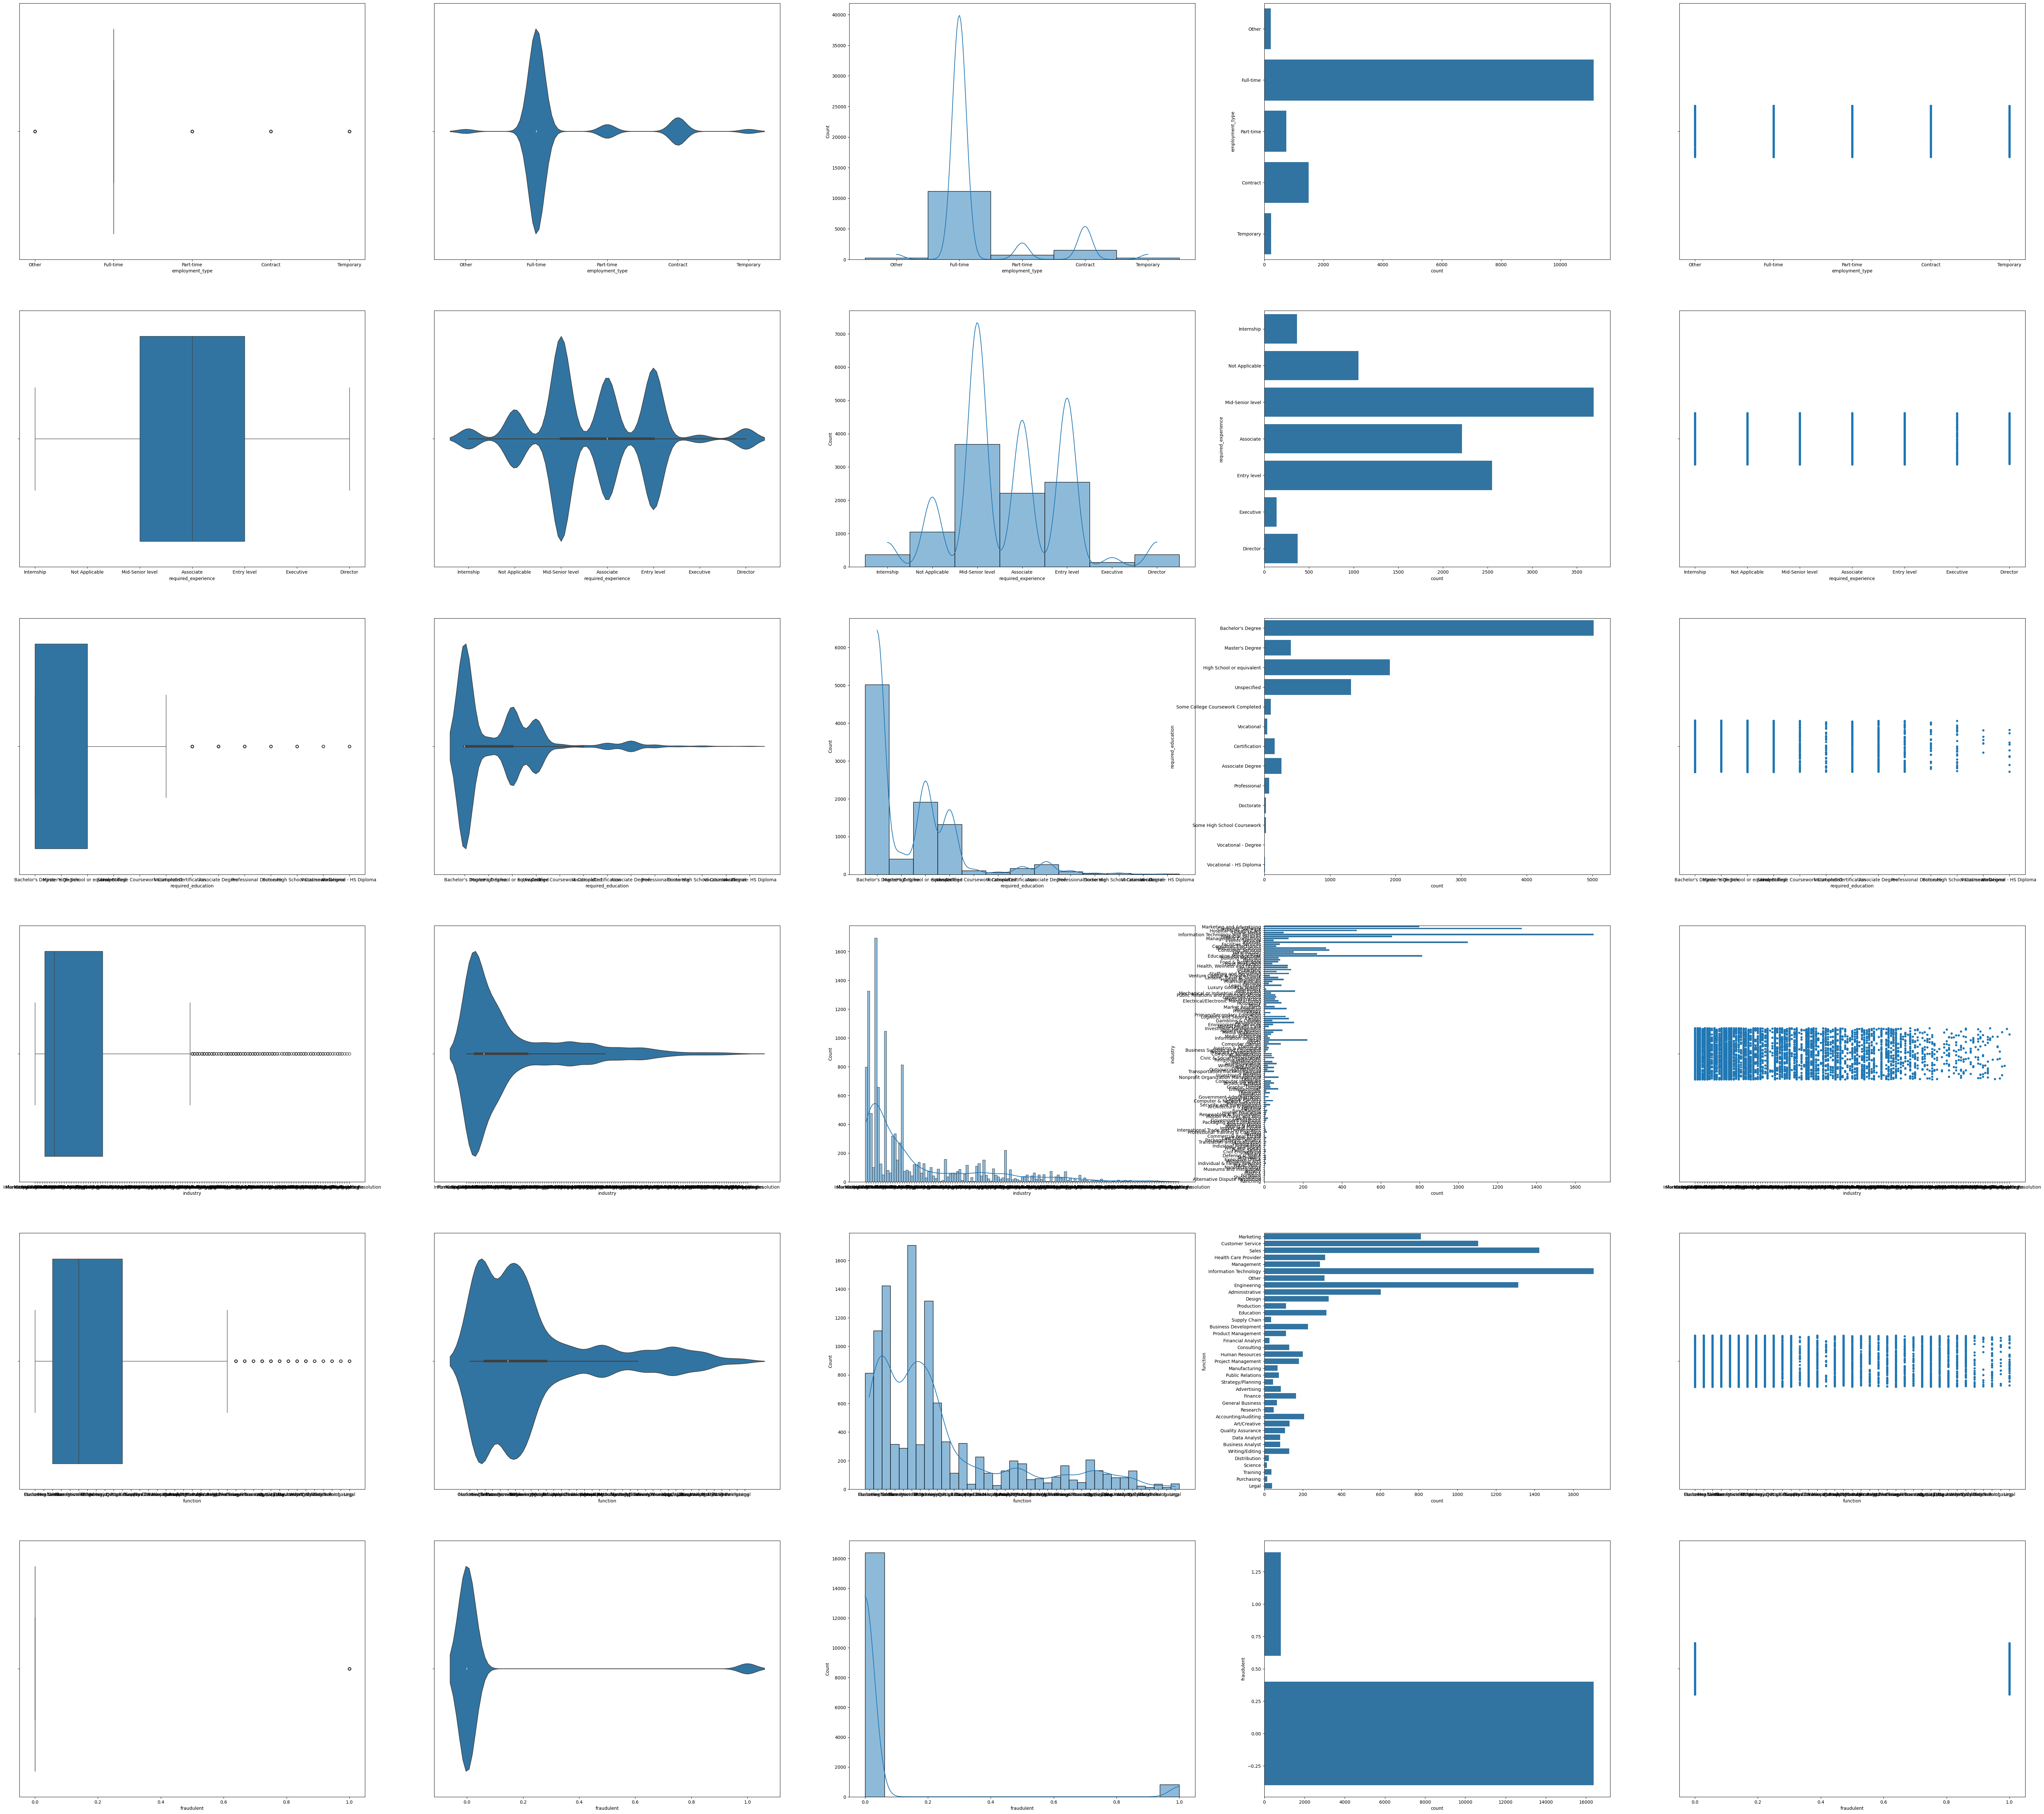

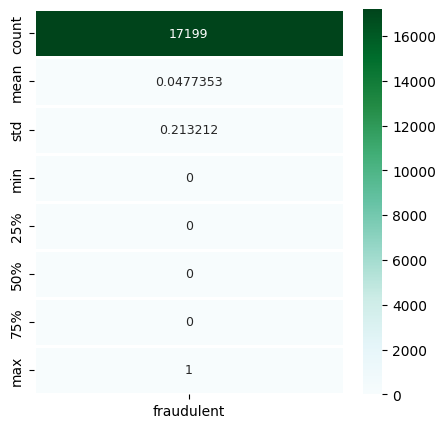

In [45]:
multiUniVarViz(catData)

#### Getting a closer look:

Approach -> For each value of predictor, see how its is related to [fraudulent] by showing % proportion of fraudulent data

#### Functions to use:

Returns Dataframe whose etries are the columns (potential predictors) and columns are % proportion of fraudulent data population for each

In [46]:
def calculate_fraud_percentage(df,col):
    # Group by 'Type' and calculate the percentage of fraud and non-fraud
    fraud_percentage = df.groupby(col)['fraudulent'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    
    # Pivot the table to have 'fraud' as columns
    fraud_percentage_pivot = fraud_percentage.pivot(index=col, columns='fraudulent', values='percentage').fillna(0)
    
    fraud_percentage_pivot.reset_index(inplace=True)
    fraud_percentage_pivot.rename(columns={1:'%Fraud'}, inplace=True)

    return fraud_percentage_pivot[[col,'%Fraud']]

-> Required Experience

Text(0, 0.5, 'No. of Jobs')

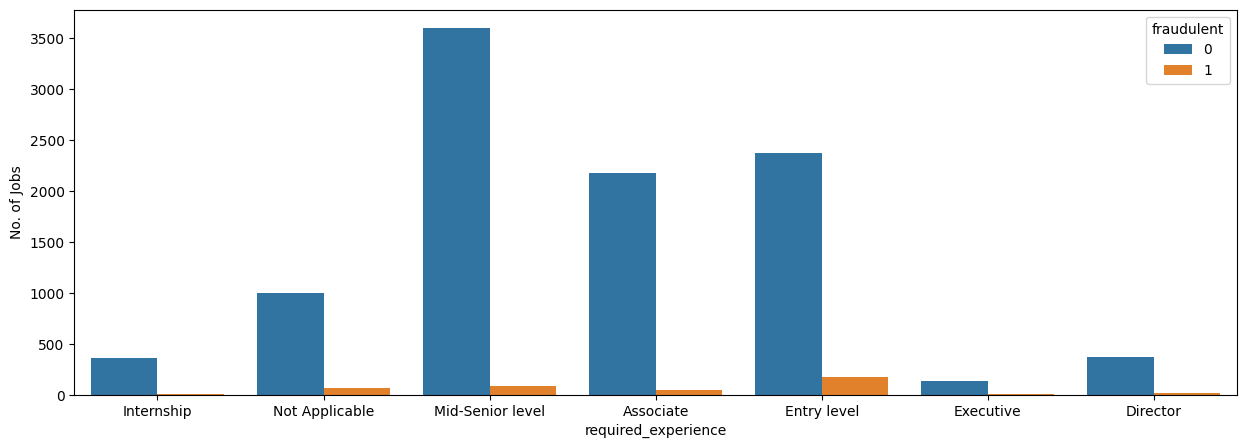

In [47]:
#Plotting the number of jobs in different required_experience fields
plt.figure(figsize=(15,5))
ax = sb.countplot(data=jobPost, x='required_experience', hue='fraudulent')

<Figure size 1500x500 with 0 Axes>

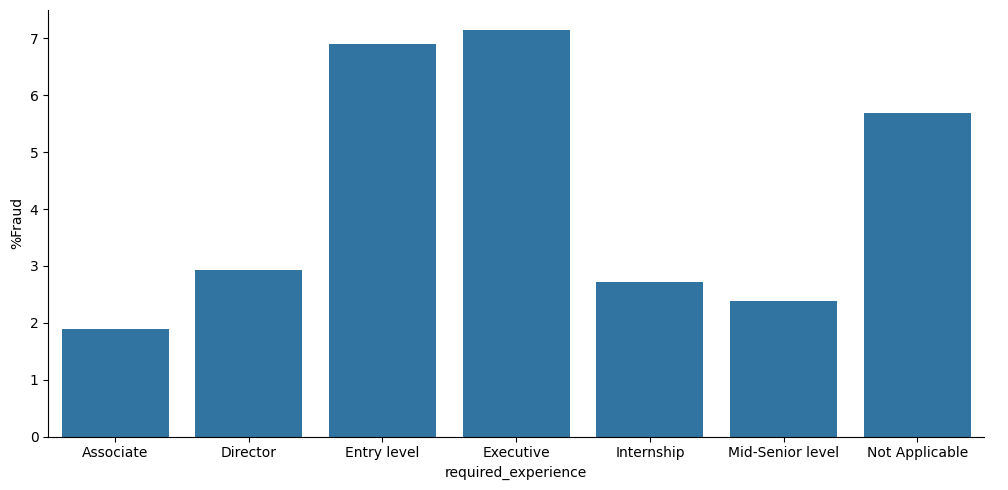

In [48]:
fp = calculate_fraud_percentage(catData[['required_experience', 'fraudulent']], 'required_experience')
plt.figure(figsize=(15,5))
ax = sb.catplot(data=fp, x='required_experience',y='%Fraud', kind='bar', aspect=2)

-> Required Education

Text(0, 0.5, 'No. of Jobs')

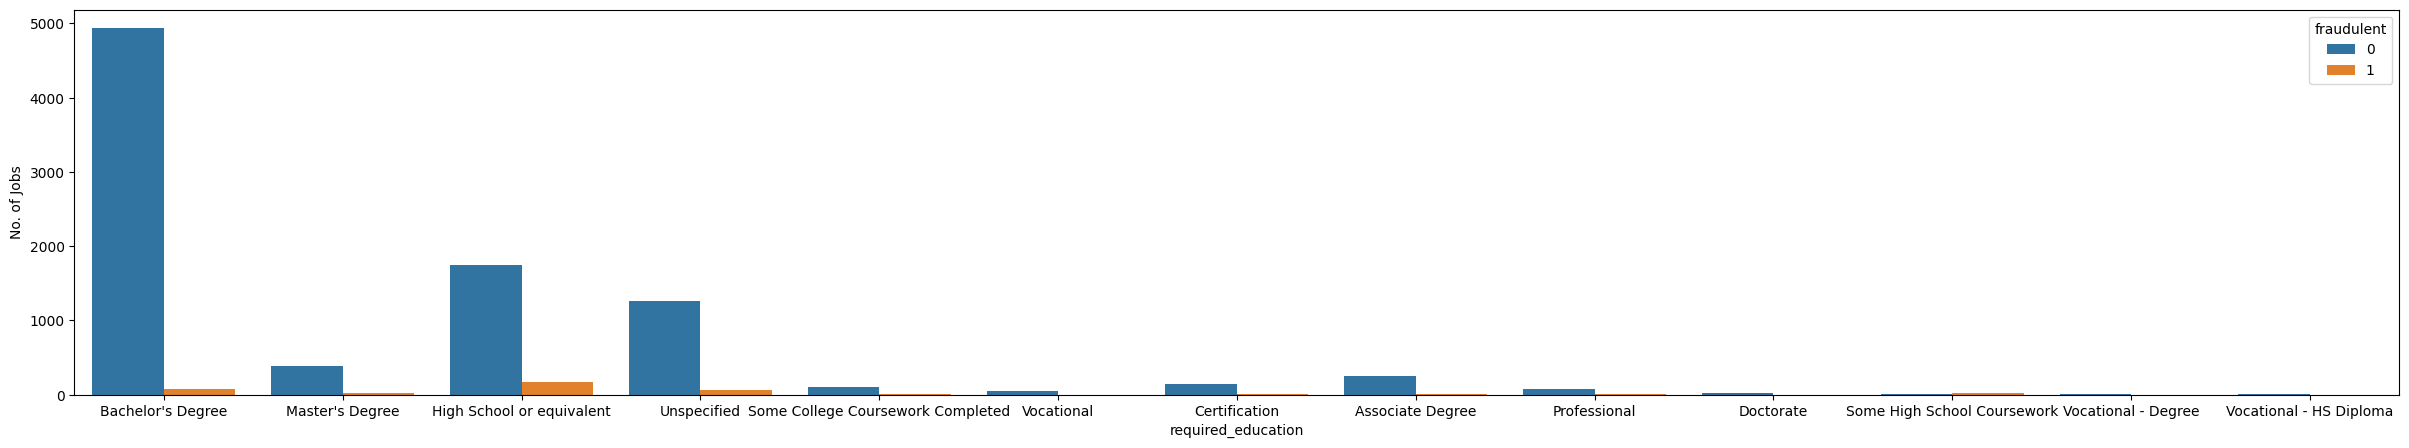

In [49]:
#Plotting the number of jobs in different required_education fields

plt.figure(figsize=(30,5))
ax = sb.countplot(data=jobPost, x='required_education', hue='fraudulent')

<Figure size 1500x500 with 0 Axes>

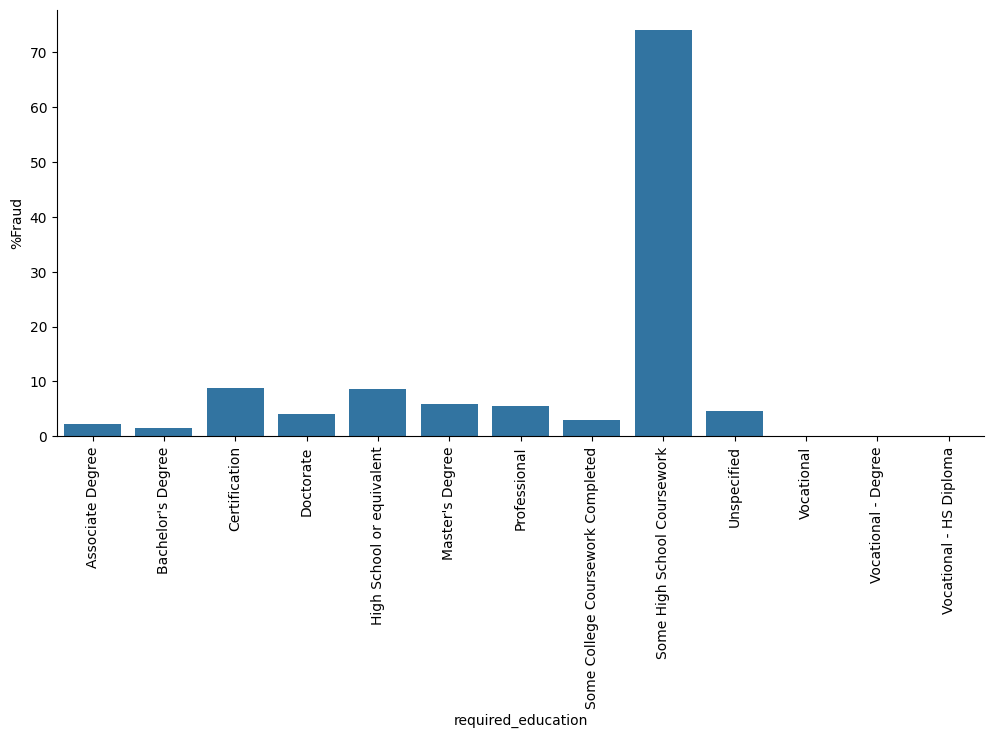

In [50]:
fp = calculate_fraud_percentage(catData[['required_education', 'fraudulent']], 'required_education')
plt.figure(figsize=(15,5))
ax = sb.catplot(data=fp, x='required_education',y='%Fraud', kind='bar', aspect=2)
ax.set_xticklabels(rotation=90)

-> Employment Type

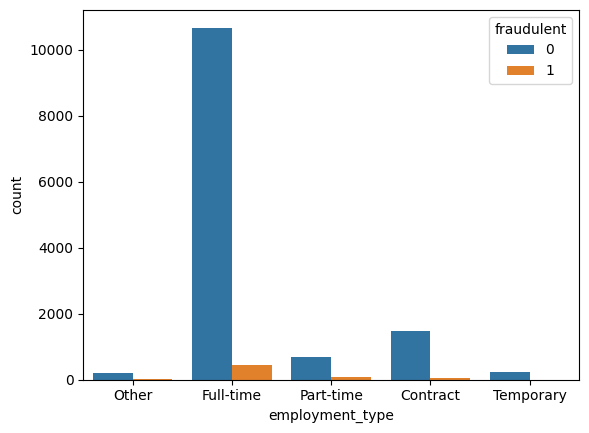

In [51]:
#Plotting the number of jobs in different employment types
ax= sb.countplot(data=jobPost, x='employment_type', hue='fraudulent')

fraudulent,employment_type,%Fraud
0,Contract,2.862850
1,Full-time,4.079432
2,Other,6.666667
3,Part-time,9.772423
4,Temporary,0.877193


<Figure size 1500x500 with 0 Axes>

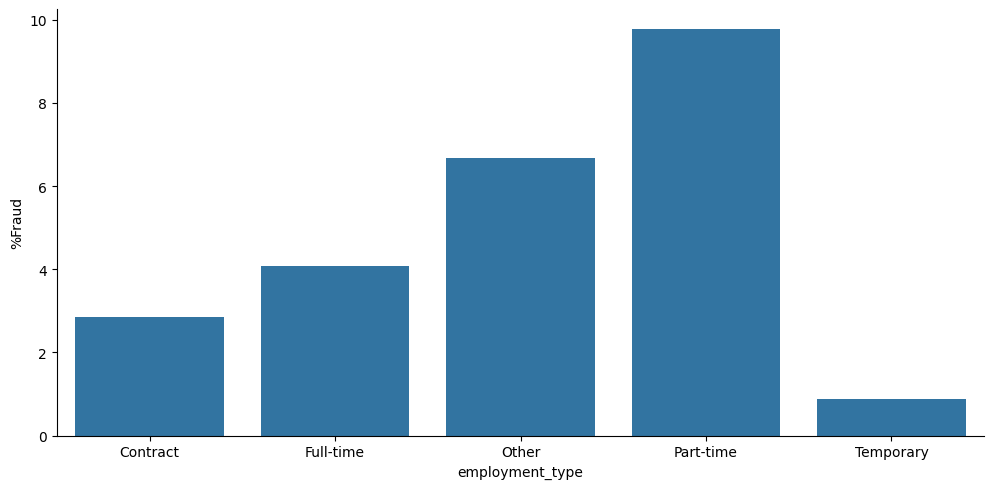

In [52]:
fp = calculate_fraud_percentage(catData[['employment_type', 'fraudulent']], 'employment_type')
plt.figure(figsize=(15,5))
ax = sb.catplot(data=fp, x='employment_type',y='%Fraud', kind='bar', aspect=2)
ax.set_xticklabels(rotation=0)
fp

-> Function

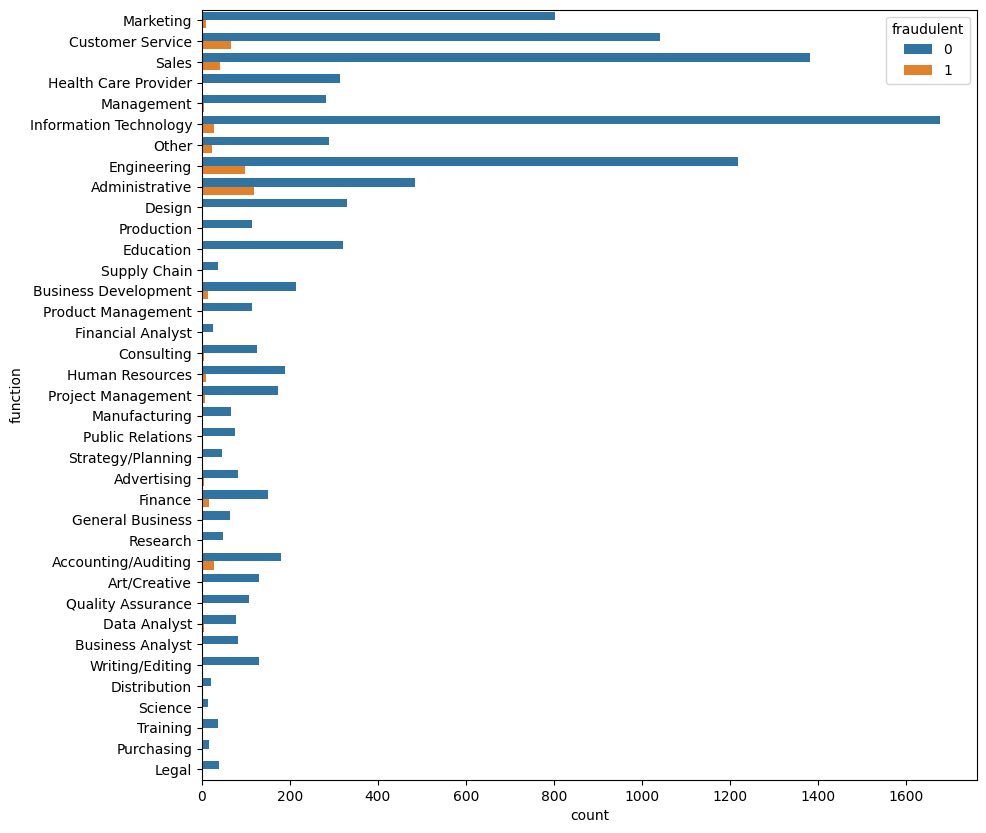

In [53]:
#Plotting the number of jobs in different function types
plt.figure(figsize=(10,10))
ax= sb.countplot(data=jobPost, y='function', hue='fraudulent')

fraudulent,function,%Fraud
0,Accounting/Auditing,13.526570
1,Administrative,19.701987
2,Advertising,5.813953
3,Art/Creative,0.763359
4,Business Analyst,1.204819
5,Business Development,5.752212
6,Consulting,3.076923
7,Customer Service,6.046931
8,Data Analyst,4.878049
9,Design,0.898204


<Figure size 1500x500 with 0 Axes>

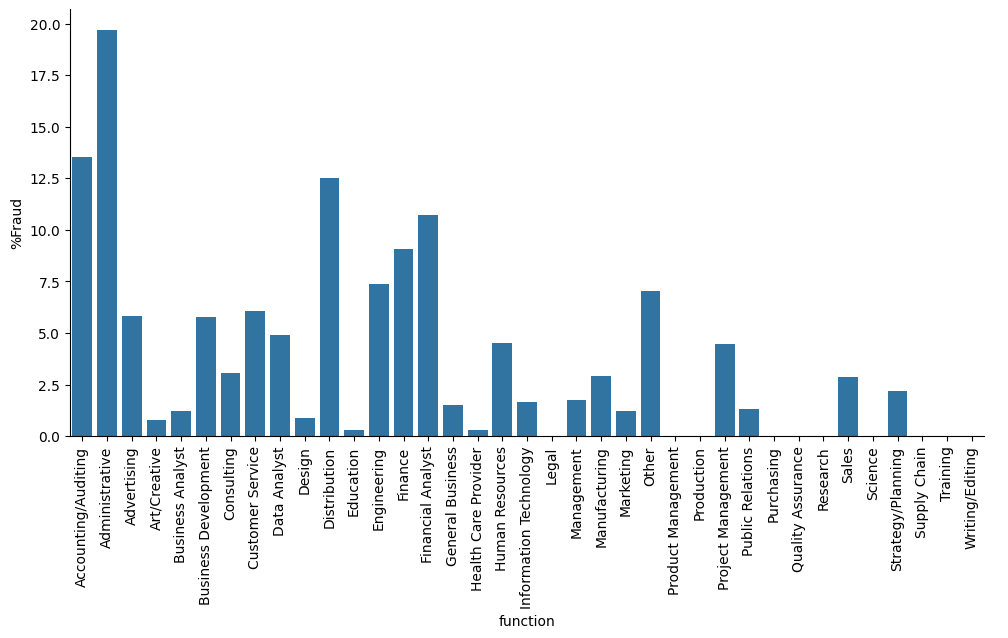

In [54]:
fp = calculate_fraud_percentage(catData[['function', 'fraudulent']], 'function')
plt.figure(figsize=(15,5))
ax = sb.catplot(data=fp, x='function',y='%Fraud', kind='bar', aspect=2)
ax.set_xticklabels(rotation=90)
fp

-> Industry

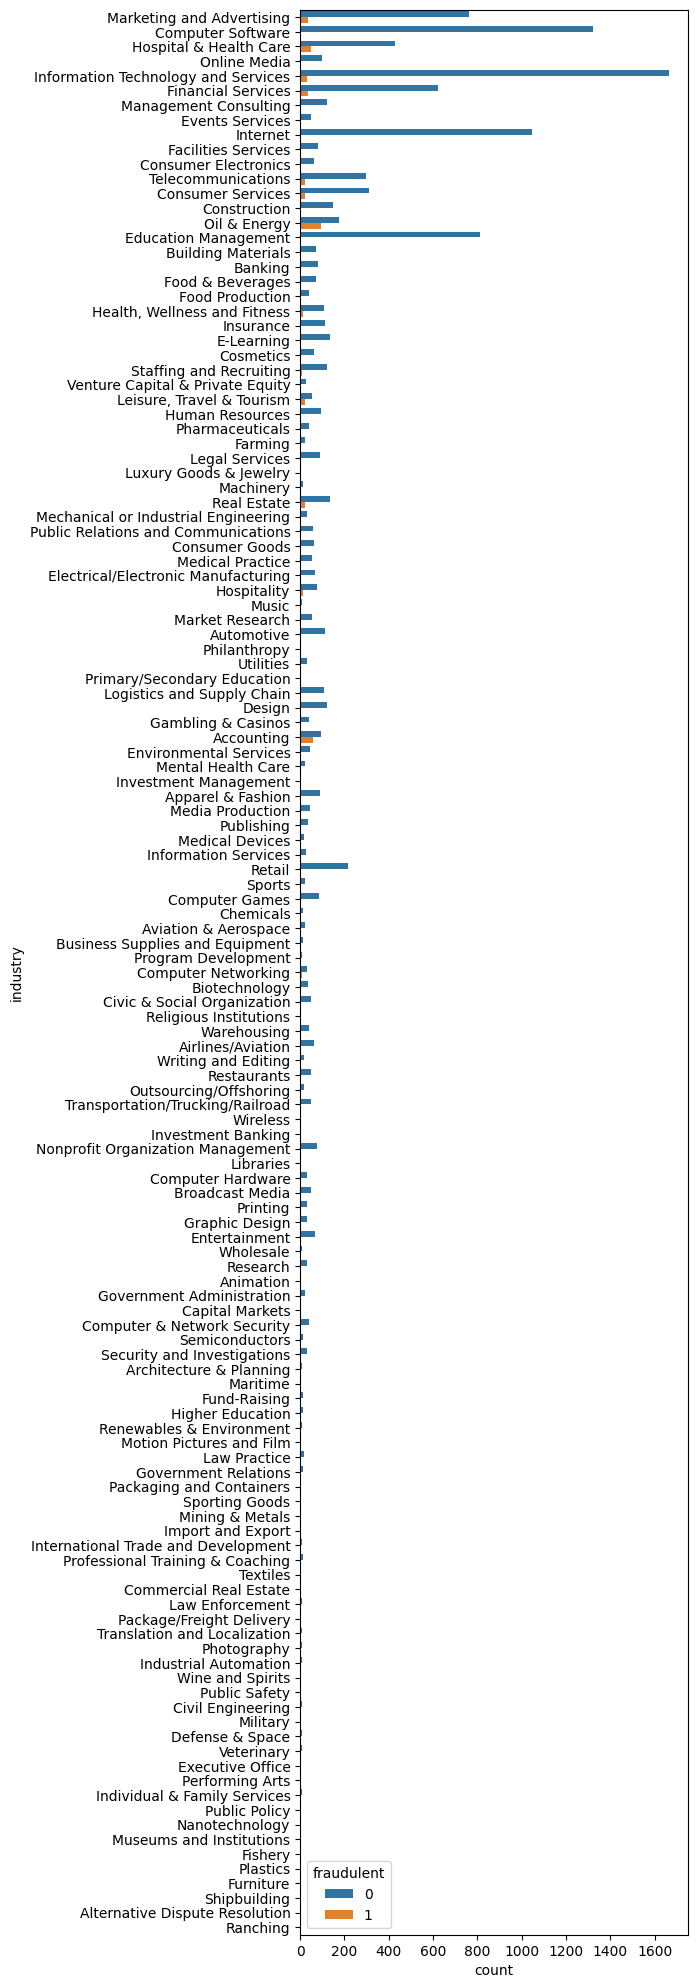

In [55]:
#Plotting the number of jobs in different industry types
plt.figure(figsize=(5,25))
ax= sb.countplot(data=jobPost, y='industry', hue='fraudulent')

fraudulent,industry,%Fraud
0,Accounting,37.254902
1,Airlines/Aviation,1.587302
2,Alternative Dispute Resolution,0.000000
3,Animation,40.000000
4,Apparel & Fashion,2.150538
...,...,...
126,Warehousing,2.380952
127,Wholesale,9.090909
128,Wine and Spirits,0.000000
129,Wireless,0.000000


<Figure size 5000x1000 with 0 Axes>

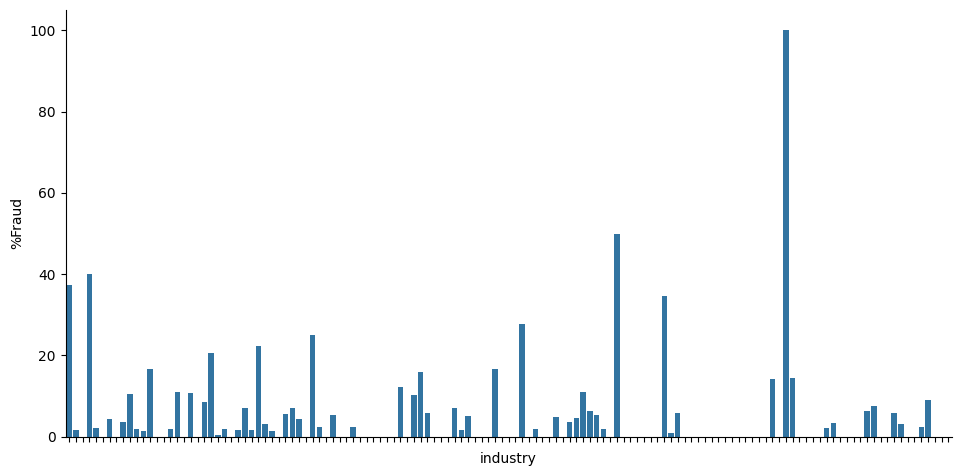

In [56]:
fp = calculate_fraud_percentage(catData[['industry', 'fraudulent']], 'industry')
plt.figure(figsize=(50,10))
ax = sb.catplot(data=fp, x='industry',y='%Fraud', kind='bar', aspect=2)
ax.set_xticklabels([],rotation=90)
fp

#### Overall mostly within single-digit percentage points between maximum and minimum [fraudulent] population proportions 
---

#### We can do much better with our approach: non-structed data
---

## 2d) The Response Variable

([<matplotlib.patches.Wedge at 0x2401172a990>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Non-Fraudulent'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fraudulent')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

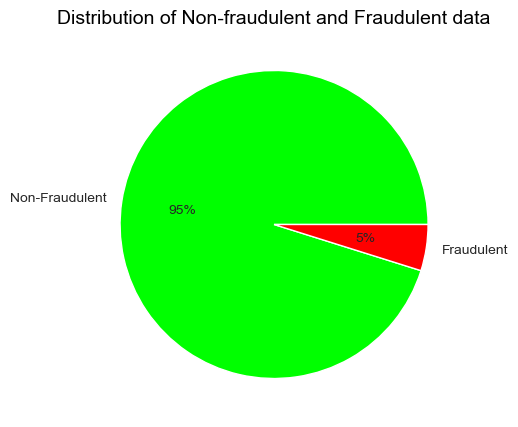

In [8]:
# Distribution of Fake job(fraudulent) and Real job(non-fraudulent) data.

labels=['Non-Fraudulent','Fraudulent']
colors = ['#00FF00','#FF0000']
plt.figure(figsize=(5,5))
plt.title('Distribution of Non-fraudulent and Fraudulent data',size=14)
sb.set_style('whitegrid')
plt.pie(jobPost['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

#### We should sample this such that it is 50:50, such to train our dataset with a more-balanced/fairer sample -> Prevents Bias, reduces Overfitting
---